3. Emotional Analytics

In [1]:
import pandas as pd
import jieba
import re

In [2]:
positive_words = {
    '甜蜜': 0.8, '幸福': 1.0, '美满': 0.9, '恩爱': 0.8, '温馨': 0.7, '和谐': 0.7, '和睦': 0.7,
    '快乐': 0.8, '喜悦': 0.8, '满意': 0.6, '满足': 0.6, '浪漫': 0.7, '忠诚': 0.8, '信任': 0.8,
    '理解': 0.7, '支持': 0.7, '鼓励': 0.7, '包容': 0.7, '宽容': 0.7, '尊重': 0.7, '体贴': 0.7,
    '关心': 0.7, '爱护': 0.7, '珍爱': 0.7, '珍惜': 0.7, '守护': 0.7, '陪伴': 0.7, '相守': 0.7,
    '相知': 0.7, '相爱': 0.7, '相依': 0.7, '相惜': 0.7, '相敬': 0.7, '承诺': 0.6, '誓言': 0.6,
    '约定': 0.6, '盟约': 0.6, '祝福': 0.6, '庆贺': 0.6, '庆祝': 0.6, '礼物': 0.5, '纪念': 0.5,
    '回忆': 0.5, '感动': 0.5, '感激': 0.5, '家庭': 0.6, '孩子': 0.6, '婚姻': 0.6,
    '神仙眷侣': 1.0, '甜到齁': 0.9, '疯狂撒糖': 0.8, '爱的魔力': 0.8, '暖到心坎': 0.7,
    '爱情长跑': 0.7, '甜甜的恋爱': 0.8, '神仙爱情': 0.8, '幸福满满': 0.9, '爱意满满': 0.8,
    '甜蜜暴击': 0.8, '心有灵犀': 0.7, '一见钟情': 0.7, '情比金坚': 0.8, '恩爱如初': 0.8,
    '白头偕老': 0.9, '情投意合': 0.8, '琴瑟和鸣': 0.8, '百年好合': 0.9, '恩爱夫妻': 0.8,
    '情深似海': 0.8, '天长地久': 0.9, '海枯石烂': 0.9, '生死相依': 0.8, '心心相印': 0.8,
    '互相扶持': 0.7, '相濡以沫': 0.8, '举案齐眉': 0.8, '情比金坚': 0.8, '恩爱有加': 0.8,
    '情深意重': 0.8, '情意绵绵': 0.7, '情真意切': 0.7, '情深似海': 0.8, '情深意切': 0.8,
    '情深如海': 0.8, '情深如海': 0.8
}

negative_words = {
    '痛苦': -0.8, '悲伤': -0.7, '失望': -0.6, '绝望': -0.8, '沮丧': -0.7, '怨恨': -0.8, '厌恶': -0.7,
    '争吵': -0.7, '争端': -0.6, '冲突': -0.6, '矛盾': -0.6, '分歧': -0.5, '冷战': -0.6, '冷漠': -0.6,
    '背叛': -0.9, '欺骗': -0.8, '外遇': -0.8, '出轨': -0.8, '不忠': -0.8, '谎言': -0.7, '猜疑': -0.7,
    '压力': -0.6, '焦虑': -0.6, '紧张': -0.6, '担忧': -0.6, '忧虑': -0.6, '恐惧': -0.7, '害怕': -0.7,
    '孤独': -0.7, '寂寞': -0.7, '无助': -0.6, '无望': -0.6, '绝望': -0.6, '痛苦': -0.6, '折磨': -0.6,
    '压抑': -0.6, '抑郁': -0.6, '疲惫': -0.5, '疲倦': -0.5, '劳累': -0.5, '失败': -0.6, '挫折': -0.6,
    '打击': -0.6, '羞耻': -0.6, '内疚': -0.6, '罪恶': -0.6, '无助': -0.6, '离婚': -0.9, '分手': -0.8,
    '分离': -0.8, '疏远': -0.7, '陌生': -0.6, '破裂': -0.8, '婚姻': -0.6,
    '心灰意冷': -0.7, '心如刀割': -0.8, '伤痕累累': -0.7, '痛不欲生': -0.9, '心如死灰': -0.8, '心碎如粉': -0.8,
    '悲痛欲绝': -0.8, '心酸不已': -0.7, '心如刀绞': -0.8, '心如刀割': -0.8, '心如刀割': -0.8, '心如刀割': -0.8,
    '心如刀割': -0.8, '心如刀割': -0.8, '心如刀割': -0.8, '心如刀割': -0.8, '心如刀割': -0.8, '心如刀割': -0.8
}

neutral_words = {
    '婚礼': 0.0, '婚宴': 0.0, '婚庆': 0.0, '婚纱': 0.0, '婚戒': 0.0, '婚房': 0.0, '婚俗': 0.0,
    '夫妻': 0.0, '家庭': 0.0, '孩子': 0.0, '生活': 0.0, '责任': 0.0, '义务': 0.0, '法律': 0.0,
    '婚姻': 0.0
}

sentiment_dict = {
    "positive": positive_words,
    "negative": negative_words,
    "neutral": neutral_words,
    "negation": {"不", "没", "无", "别", "非", "莫", "勿"},
    "degree": {"非常": 2.0, "很": 1.5, "有点": 0.5, "极其": 2.5, "特别": 1.8, "稍稍": 0.3, "相当": 1.7}  
}

In [3]:
def sentiment_analysis(words, sentiment_dict):
    score = 0
    
    i = 0
    while i < len(words):
        word = words[i]
        
        if word in sentiment_dict["positive"] or word in sentiment_dict["negative"]:
            if word in sentiment_dict["positive"]:
                sentiment_score = sentiment_dict["positive"][word]
            else:
                sentiment_score = sentiment_dict["negative"][word]
            
            j = i - 1
            while j >= 0 and (words[j] in sentiment_dict["negation"] or words[j] in sentiment_dict["degree"]):
                if words[j] in sentiment_dict["negation"]:
                    sentiment_score *= -1
                elif words[j] in sentiment_dict["degree"]:
                    sentiment_score *= sentiment_dict["degree"][words[j]]
                j -= 1
            
            score += sentiment_score
        
        i += 1
    
    return score

In [5]:
df = pd.read_csv('xhs_content_segmented.csv')

results = []

for index, row in df.iterrows():
    segmented_text = row['Tokenization Result']
    
    if pd.isna(segmented_text):
        score = 0  
    else:
        words = segmented_text.split()
        score = sentiment_analysis(words, sentiment_dict)
    
    results.append(score)

df['emotional score'] = results

df['emotional tendency'] = df['emotional score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

df.head(20)

,title,time,liked_count,collected_count,comment_count,tag_list,note_url,source_keyword,cleaned_review,Tokenization Result,emotional score,emotional tendency
0,我们结婚啦?????♀??????♂???,2024-10-27 03:33:20,12.4万,7736,9574,NaN,https://www.xiaohongshu.com/explore/66ff3fc300...,婚姻,遇见你是我一生最幸运的事情。 大学初识，你总等我上完最后一节晚课一起在操场上走着一圈又一圈地...,遇见 幸运 事情 大学 初识 上完 晚课 操场上 走 聊天 带 巴斯 小区 聊 好像 聊 完...,4.2,positive
1,有婚后过的特别幸福的姐妹来讲一下感受吗,2022-08-08 23:06:40,9.9万,5.4万,1.7万,NaN,https://www.xiaohongshu.com/explore/62f3bd8d00...,婚姻,未婚 太丧了 身边的朋友结婚以后过的也都不咋好 根本对婚姻没啥期待,未婚 朋友 结婚 婚姻 期待,0.6,positive
2,不结婚，你的罪名就只有不结婚,2024-07-03 09:46:40,8.3万,2.8万,6661,"不婚,结婚的意义,爱情婚姻观,人生感悟,一起来讨论,人生,不婚主义,停止内耗,拒绝内耗,人间...",https://www.xiaohongshu.com/explore/664ec95c00...,婚姻,NaN,NaN,0.0,neutral
3,哭死了，这就是结婚7年后的深夜。。。,2022-12-02 16:53:20,6.9万,6596,6475,"婚后生活,老公,婚姻,七年之痒,恋爱长跑,结婚,爱情",https://www.xiaohongshu.com/explore/63751e3c00...,婚姻,我和平常一样在熬夜刷小红书，老公本来在我旁边睡的安稳，没想到忽然通红着双眼支起半个身子伸手挡...,平常 熬夜 书 老公 睡 安稳 支起 身子 伸手 挡住 头 笑 先松 笑 梦见 楼 塌 东西...,0.0,neutral
4,很多人怕结婚，到底是怕什么？这篇绝了,2022-08-08 23:06:40,6.4万,3.4万,1669,"书摘,婚姻,爱情,情感,女人",https://www.xiaohongshu.com/explore/62ddf1c900...,婚姻,出处：《成年人的世界没有容易二字》 作者：老杨的猫头鹰 很多人都怕结婚， 到底是在怕什么呢 ...,出处 成年人 世界 字 作者 老杨 猫头鹰 怕 结婚 怕 怕 提及 彩礼 怕 陌生 像是 精...,-1.5,negative
5,我身边的富二代和普女结婚的例子,2023-03-28 10:40:00,4.4万,1.2万,2062,"人生智慧,向上社交,人生建议",https://www.xiaohongshu.com/explore/6428440300...,婚姻,仅从我身边的例子出发哈 男生家里应该是中产偏上的，从小读国际学校，吃住也是精英那一套，女生家...,例子 出发 男生 读 国际 学校 吃住 精英 女生 家境 有趣 能量 夏令营 女生 男生 消...,0.7,positive
6,没必要把婚姻包装得那么浪漫,2024-10-27 03:33:20,3.7万,7639,6545,"女性,女性成长,女性智慧,爱情婚姻观,婚姻观",https://www.xiaohongshu.com/explore/66dfb1e500...,婚姻,哇好喜欢这个脱口秀演员！！！,喜欢 演员,0.0,neutral
7,两个人是不适合结婚，原则只有一条,2024-10-27 03:33:20,3.4万,2万,1174,"笔记灵感,日常碎片PLOG,海外生活,恋爱,留学",https://www.xiaohongshu.com/explore/670f6d8400...,婚姻,NaN,NaN,0.0,neutral
8,相爱9年多了，每天都为我的先生折服?,2023-11-14 22:13:20,3.2万,9132,1380,"婚后生活,夫妻相处,夫妻,异国婚姻,浪漫生活的记录者,相爱十年",https://www.xiaohongshu.com/explore/655c226b00...,婚姻,从没想过我可以和另一个人携手迈向第十年。从小到大做事不过三分钟热度的我，对待男人也有一样不够...,携手 迈向 热度 对待 男人 热情 讨厌 特性 懒惰 贪婪 嫉妒 内心 孕育 阴暗 展现 过...,1.8,positive
9,果然罗素开口就是王炸！真的太敢说了??,2024-07-03 09:46:40,3.1万,8970,2464,"成长,婚姻,爱情,孩子,感悟,女性,我会被文字打动,焦虑",https://www.xiaohongshu.com/explore/66cda9c400...,婚姻,罗素真的太通透了，这些天看了他近百年前的作品《婚姻与爱情》，里面对与爱情和婚姻关系的探讨简直...,罗素 作品 婚姻 爱情 爱情 婚姻关系 探讨 父亲 角色 消失 期望 婚姻 幸福 婚姻 幸福...,4.4,positive


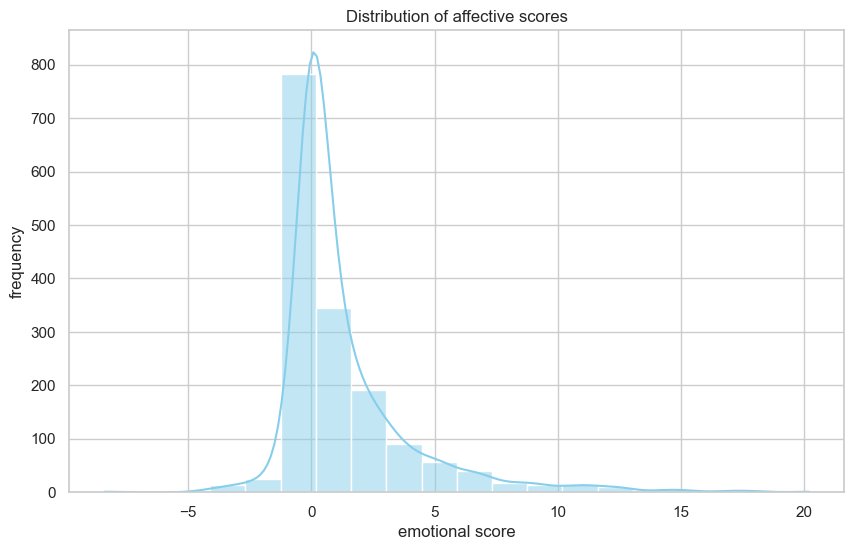

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['emotional score'], bins=20, kde=True, color='skyblue')
plt.xlabel('emotional score')
plt.ylabel('frequency')
plt.title('Distribution of affective scores')
plt.show()

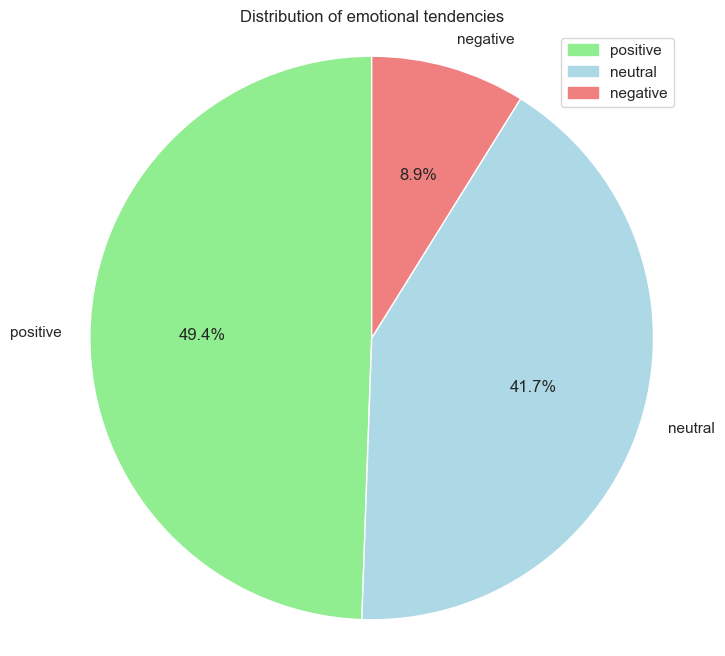

In [7]:
import matplotlib.pyplot as plt

sentiment_counts = df['emotional tendency'].value_counts()

colors = {'positive': 'lightgreen', 'negative': 'lightcoral', 'neutral': 'lightblue'}
labels = sentiment_counts.index

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=[colors[label] for label in labels], startangle=90)
plt.title('Distribution of emotional tendencies')
plt.axis('equal')  

handles = [plt.Rectangle((0,0), 1, 1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='best')

plt.show()